In [6]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [7]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path('../5.Resources/fraud_det_dig_df.csv')   
)

# Review the DataFrame
df.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day,week,trans_weight,bal_change_per,large_transaction,type_CASH_OUT,type_TRANSFER,Destination
0,1,181.00,181.00,0.0,0.0,0.00,1,0,1,1,1,1.00,-1.00,0,0,1,0
1,1,181.00,181.00,0.0,21182.0,0.00,1,0,1,1,1,1.00,-1.00,0,1,0,1
2,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,1,1,1,14.95,-1.00,1,1,0,2
3,1,215310.30,705.00,0.0,22425.0,0.00,0,0,1,1,1,305.40,-1.00,1,0,1,3
4,1,311685.89,10835.00,0.0,6267.0,2719172.89,0,0,1,1,1,28.77,-1.00,1,0,1,4
5,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,1,1,1,4.11,-1.00,1,1,0,5
6,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0,1,1,1,29.33,-1.00,0,1,0,6
7,1,5346.89,5346.89,0.0,652637.0,6453430.91,0,0,1,1,1,1.00,-1.00,0,1,0,7
8,1,23261.30,20411.53,0.0,25742.0,0.00,0,0,1,1,1,1.14,-1.00,0,1,0,8
9,1,62610.80,79114.00,16503.2,517.0,8383.29,0,0,1,1,1,0.79,-0.79,0,0,1,9


In [8]:
# Explore unique variables
unique_counts=df.nunique()
print(unique_counts)

step                     743
amount               2685804
oldbalanceOrg        1713079
newbalanceOrig        271977
oldbalanceDest       2360844
newbalanceDest       2562839
isFraud                    2
isFlaggedFraud             2
hour                      24
day                       31
week                       5
trans_weight          116107
bal_change_per           103
large_transaction          2
type_CASH_OUT              2
type_TRANSFER              2
Destination           509561
dtype: int64


In [9]:
## DEFINE target Class and set X variables
# Separate features and target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']


In [10]:
# Perform train-test split on the original DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Scaling Data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# UNDERSAMPLING using RandomUndersampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train.ravel())


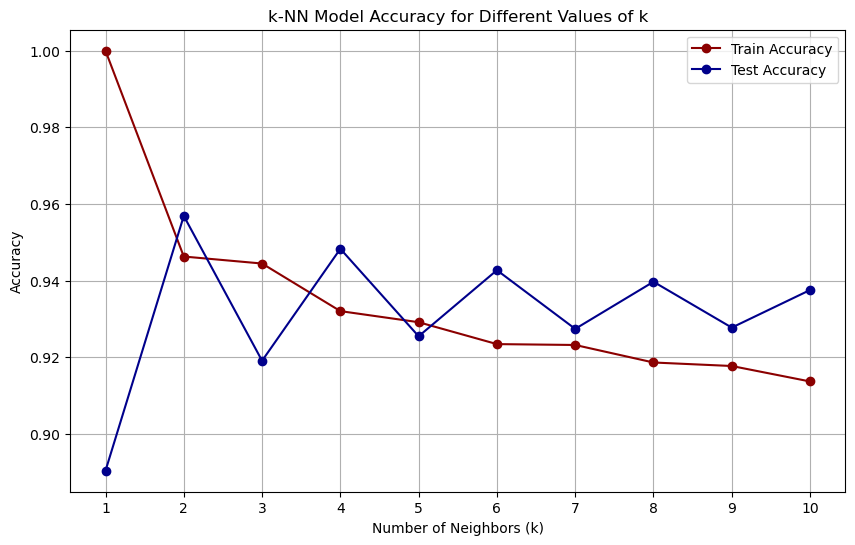

In [12]:
# Range of k values to test
k_values = range(1, 11)  # Testing k from 1 to 10

# Lists to store accuracy scores for different k values
train_accuracy = []
test_accuracy = []

# Loop through different k values
for k in k_values:
    # Create a k-NN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the training data
    knn.fit(X_rus, y_rus)
    
    # Calculate accuracy on the training data
    train_accuracy.append(knn.score(X_rus, y_rus))
    
    # Calculate accuracy on the testing data
    test_accuracy.append(knn.score(X_test_scaled, y_test))

# Plot the accuracy values for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, label='Train Accuracy', marker='o', color='darkred')
plt.plot(k_values, test_accuracy, label='Test Accuracy', marker='o', color ='darkblue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Model Accuracy for Different Values of k')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training data
knn.fit(X_rus, y_rus)

# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [14]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    552445
           1       0.03      0.89      0.06      1634

    accuracy                           0.92    554079
   macro avg       0.52      0.91      0.51    554079
weighted avg       1.00      0.92      0.96    554079



In [15]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[507792,    178],
       [ 44653,   1456]], dtype=int64)

In [16]:
# Instantiate the KNeighborsClassifier model with n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors=2)

# Train the model using the training data
knn.fit(X_rus, y_rus)

# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [17]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    552445
           1       0.06      0.84      0.10      1634

    accuracy                           0.96    554079
   macro avg       0.53      0.90      0.54    554079
weighted avg       1.00      0.96      0.98    554079



In [18]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[528815,    258],
       [ 23630,   1376]], dtype=int64)

In [19]:
# Instantiate the KNeighborsClassifier model with n_neighbors = 4
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model using the training data
knn.fit(X_rus, y_rus)

# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [20]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    552445
           1       0.05      0.86      0.09      1634

    accuracy                           0.95    554079
   macro avg       0.52      0.91      0.53    554079
weighted avg       1.00      0.95      0.97    554079



In [21]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[524026,    224],
       [ 28419,   1410]], dtype=int64)